In [60]:
!pip install pandas
!pip install seaborn


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load dataset
df = pd.read_csv('Dataset_ecommerce.csv', parse_dates=['InvoiceDate'], dayfirst=True)


In [7]:
# Display basic information
print(df.info())
display(df.head())  # Shows first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [9]:
# Checking the shape of the dataset
df.shape

(541909, 8)

In [11]:
# Checking for null/missing values
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [13]:
# Drop missing values
df = df.dropna(subset=['CustomerID'])

In [15]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [17]:
# Checking for Duplicate values
df.duplicated().sum()

0

In [19]:
# Change customerID  data type as float to a string
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [23]:
# Check for unique values
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()
num_countries = df['Country'].nunique()

In [25]:
# Print unique values
print(f'Number of unique customers: {num_customers}')
print(f'Number of transactions: {num_transactions}')
print(f'Number of products: {num_products}')
print(f'Unique Countries: {num_countries}')

Number of unique customers: 4372
Number of transactions: 22190
Number of products: 9000
Unique Countries: 28


In [27]:
# Get transaction period
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [29]:
# Print transaction period
print(f'Transaction period: {date_range[0]}, {date_range[1]}')


Transaction period: 2010-12-01 08:26:00, 2011-12-09 12:50:00


In [31]:
# Count negative or zero values
zero_or_negative_qty = (df['Quantity'] <= 0).sum()
zero_or_negative_price = (df['UnitPrice'] <= 0).sum()

print(f'Rows with zero/negative Quantity: {zero_or_negative_qty}')
print(f'Rows with zero/negative UnitPrice: {zero_or_negative_price}')


Rows with zero/negative Quantity: 0
Rows with zero/negative UnitPrice: 0


In [33]:
# Top Countries by unique customers
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

In [35]:
print(top_countries)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


C:\Users\oguch\AppData\Local\Temp\ipykernel_1980\4149268934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.values, y = top_countries.index, palette ='viridis')


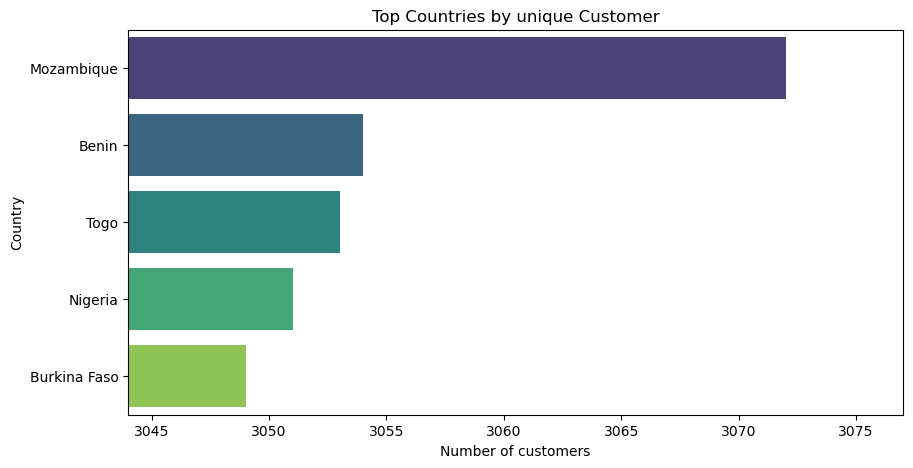

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x = top_countries.values, y = top_countries.index, palette ='viridis')
plt.xlim(min(top_countries.values - 5), max(top_countries.values + 5))
plt.title('Top Countries by unique Customer')
plt.ylabel('Country')
plt.xlabel('Number of customers')
plt.show()

In [39]:
# Assign InvoiceMonth (transaction month)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [41]:
# Add TotalPrice column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [43]:
monthly_sales = df.groupby('InvoiceMonth', as_index=False)['Revenue'].sum()

In [45]:
# Convert InvoiceMonth to datetime for plotting
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

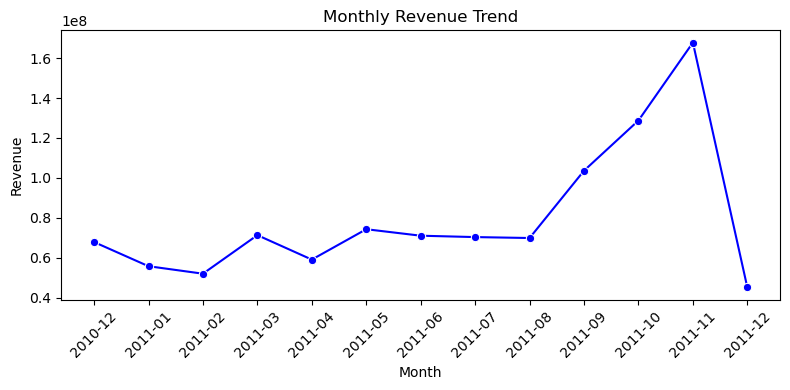

In [47]:
plt.figure(figsize=(8,4))
sns.lineplot(x='InvoiceMonth', y='Revenue', data=monthly_sales, marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Cohort Analysis

In [51]:
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [53]:
cohort_data.name = 'CohortMonth'

In [55]:
cohort_data

CustomerID
12346    2011-01
12347    2010-12
12348    2010-12
12349    2011-11
12350    2011-02
          ...   
18280    2011-03
18281    2011-06
18282    2011-08
18283    2011-01
18287    2011-05
Name: CohortMonth, Length: 4372, dtype: period[M]

In [57]:
df = df.merge(cohort_data, on='CustomerID')


In [59]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12


In [61]:
invoice_year, invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [63]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [65]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1


In [67]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [69]:
cohort_pivot = cohort_counts.pivot(index= 'CohortMonth', columns= 'CohortIndex', values= 'CustomerID')

In [71]:
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

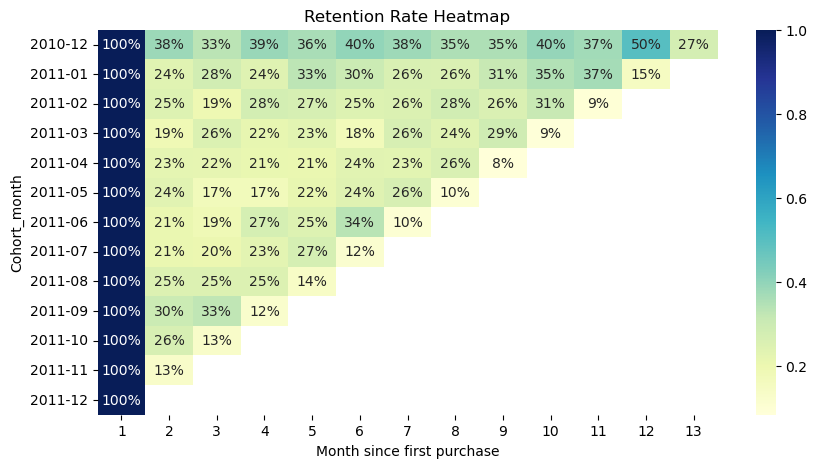

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Retention Rate Heatmap')
plt.xlabel('Month since first purchase')
plt.ylabel('Cohort_month')
plt.show

In [77]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [79]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': 'sum'
}).reset_index()


In [81]:
rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'monetary']

In [83]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [85]:
rfm.describe()

,recency_days,frequency,monetary
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,5.075480,2.372909e+05
std,100.765435,9.338754,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,1.000000,4.350893e+04
50%,50.000000,3.000000,1.066925e+05
75%,143.000000,5.000000,2.599154e+05
max,374.000000,248.000000,2.038383e+07


In [87]:
# Features
x = rfm[['recency_days', 'frequency', 'monetary']].copy()

In [89]:
from sklearn.preprocessing import StandardScaler

In [91]:
# Scale features
ss = StandardScaler()

In [93]:
x_scaled = ss.fit_transform(x)

In [95]:
# Display as Numpy array
x_scaled[:5]

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

In [97]:
from sklearn.cluster import KMeans

In [99]:
from sklearn.metrics import silhouette_score

In [101]:
# Initialize lists
inertia = []
s_score = []
k_range = range(2,11)

In [103]:
# Loop through cluster range
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(x_scaled)
    inertia.append(km.inertia_)
    s_score.append(silhouette_score(x_scaled, labels))


In [105]:
inertia

[9046.078478815765,
 5336.966767083279,
 3523.5663091538927,
 2838.880253520754,
 2324.0626245152553,
 1879.275737782309,
 1646.4006901120965,
 1489.475790727055,
 1323.1187606006392]

Text(0, 0.5, 'inertia')

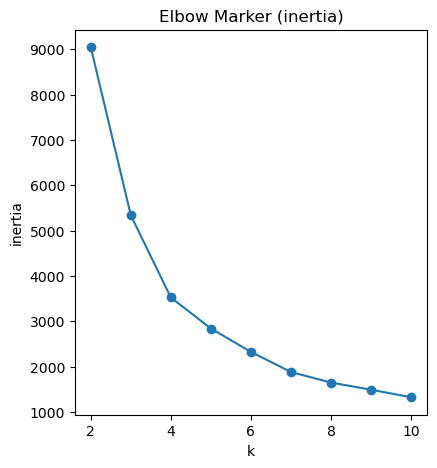

In [107]:
# Elbow Method plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Marker (inertia)')
plt.xlabel('k')
plt.ylabel('inertia')

Text(0, 0.5, 'Score')

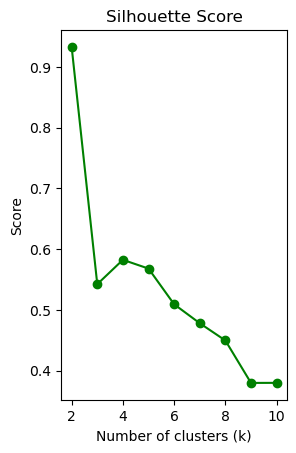

In [109]:
# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(k_range, s_score, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

In [111]:
!pip install yellowbrick

In [113]:
from yellowbrick.cluster import KElbowVisualizer

In [115]:
model = KMeans(random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

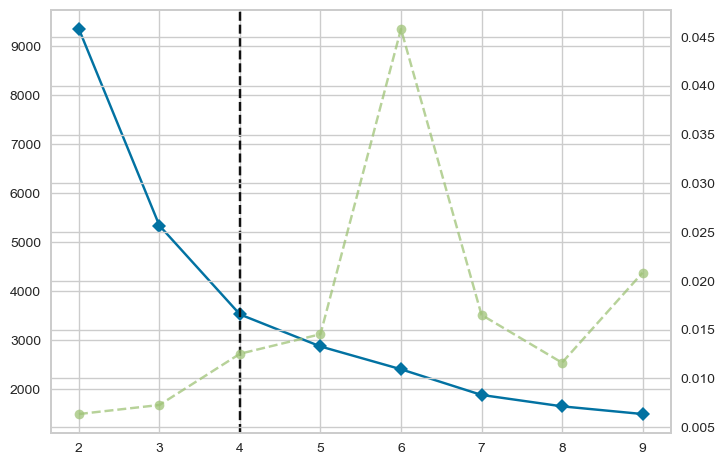

In [117]:
v = KElbowVisualizer(model, k=(2,10))
v.fit(x_scaled)

In [119]:
# KMeans clustering
final_k =4
final_model = KMeans(n_clusters=final_k, random_state= 42)

In [121]:
final_model.fit(x_scaled)

KMeans(n_clusters=4, random_state=42)

In [123]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [125]:
rfm['cluster'] = final_model.labels_
rfm.head()


,CustomerID,recency_days,frequency,monetary,cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1


In [127]:
cluster_profile = (
    rfm.groupby('cluster').agg({
        'recency_days': 'mean',
        'frequency': 'mean',
        'monetary': 'mean',
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'NumCustomers'}).round(1)
)

In [129]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


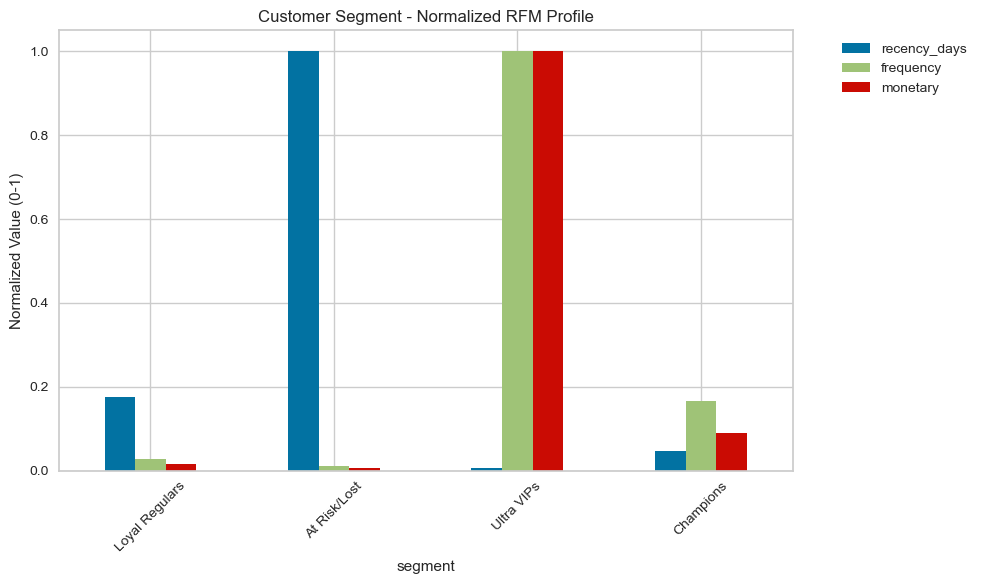

In [131]:
cluster_names = {
    0: "Loyal Regulars",
    1: "At Risk/Lost",
    2: "Ultra VIPs",
    3: "Champions"
}

# Add segment names
cluster_profile['segment'] = cluster_profile.index.map(cluster_names)

# Create normalized values for plotting
df_plot = cluster_profile.copy()
df_plot[['recency_days', 'frequency', 'monetary']] = (
    df_plot[['recency_days', 'frequency', 'monetary']].apply(lambda x: x/x.max())
)

# Plot
df_plot.set_index('segment')[['recency_days', 'frequency', 'monetary']].plot(
    kind='bar', figsize=(10,6)
)
plt.title("Customer Segment - Normalized RFM Profile")
plt.ylabel("Normalized Value (0-1)")
plt.xticks(rotation=45)
plt.legend(['recency_days', 'frequency', 'monetary'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [133]:
ultra_vips = rfm[rfm['cluster'] == 2].copy()

In [135]:
ultra_vips

,CustomerID,recency_days,frequency,monetary,cluster
330,12748,1,224,11912482.34,2
1300,14096,4,34,12965429.74,2
1674,14606,1,128,7144512.92,2
1895,14911,1,248,15362741.47,2
2192,15311,1,118,6301150.63,2
4042,17841,2,169,20383830.65,2


In [142]:
customer_cohort = df[['CustomerID', 'CohortMonth']].drop_duplicates()

In [144]:
cluster2_customers = ultra_vips.merge(customer_cohort, on='CustomerID', how='left')

In [146]:
cluster2_customers

,CustomerID,recency_days,frequency,monetary,cluster,CohortMonth
0,12748,1,224,11912482.34,2,2010-12
1,14096,4,34,12965429.74,2,2011-08
2,14606,1,128,7144512.92,2,2010-12
3,14911,1,248,15362741.47,2,2010-12
4,15311,1,118,6301150.63,2,2010-12
5,17841,2,169,20383830.65,2,2010-12


This is for the purpose of got version control
